##### EDA Continued


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [2]:
pd.get_option("display.max_columns",None)

20

Under loan_status category 0 is defaulter and 1 is for non defaulter

In [3]:
import pandas as pd
df = pd.read_csv("outliers.csv", encoding='utf8')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,confidence
0,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,1.00,f,0.0,1,0,0.0,0,0.0,0.0,yes
1,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,20.00,f,0.0,1,0,0.0,0,0.0,0.0,yes
2,1069639,1304742,7000,7000,7000.00,60 months,15.96%,170.08,C,C5,...,23.51,f,0.0,1,0,0.0,0,0.0,0.0,yes
3,1072053,1288686,3000,3000,3000.00,36 months,18.64%,109.43,E,E1,...,5.35,f,0.0,1,0,0.0,0,0.0,0.0,yes
4,1071570,1306721,5375,5375,5350.00,60 months,12.69%,121.45,B,B5,...,18.08,f,0.0,1,0,0.0,0,0.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,200600,200597,7500,7500,1599.78,36 months,9.83%,241.41,B,B3,...,2.69,f,0.0,1,0,0.0,0,1.0,0.0,no
23794,186572,186568,12000,12000,725.00,36 months,9.01%,381.66,B,B2,...,6.64,f,0.0,1,0,0.0,0,1.0,0.0,no
23795,158706,158450,12375,12375,1000.00,36 months,10.91%,404.62,C,C3,...,9.23,f,0.0,1,0,0.0,0,1.0,0.0,no
23796,154154,151536,4800,4800,1100.00,36 months,10.28%,155.52,C,C1,...,7.51,f,0.0,1,0,0.0,0,1.0,0.0,no


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'confidence'],
      dtype='object')

In [5]:
df.shape

(23798, 34)

##### Univariate and Bivariate Analysis

Removing all the nan values from rows

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(23798, 34)

##### Data Transformations needed


In [8]:
df['term'].replace([' 36 months',' 60 months'],[0,1],inplace=True)
df['term'].astype('int')
df['home_ownership'].replace(['RENT','OWN','OTHER','MORTGAGE','NONE'],[0,1,2,3,4],inplace=True)
df['home_ownership'].astype('int')
df['emp_length'].replace(['< 1 year', '10+ years', '8 years', '9 years', '5 years',\
       '3 years', '1 year', '2 years', '4 years', '6 years', '7 years'],[0,1,2,3,4,5,6,7,8,9,10], inplace = True)
df['emp_length'].astype('int')

0         0
1         1
2         2
3         3
4         0
         ..
23793    10
23794     9
23795     7
23796     6
23797     2
Name: emp_length, Length: 23798, dtype: int32

In [9]:
pd.get_option("display.max_rows",None)

60

In [10]:
df['verification_status'].replace(["Verified","Source Verified","Not Verified"],[0,1,2],inplace = True)
df["verification_status"].astype(int)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,confidence
0,1077430,1314167,2500,2500,2500.00,1,15.27%,59.83,C,C4,...,1.00,f,0.0,1,0,0.0,0,0.0,0.0,yes
1,1076863,1277178,10000,10000,10000.00,0,13.49%,339.31,C,C1,...,20.00,f,0.0,1,0,0.0,0,0.0,0.0,yes
2,1069639,1304742,7000,7000,7000.00,1,15.96%,170.08,C,C5,...,23.51,f,0.0,1,0,0.0,0,0.0,0.0,yes
3,1072053,1288686,3000,3000,3000.00,0,18.64%,109.43,E,E1,...,5.35,f,0.0,1,0,0.0,0,0.0,0.0,yes
4,1071570,1306721,5375,5375,5350.00,1,12.69%,121.45,B,B5,...,18.08,f,0.0,1,0,0.0,0,0.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,200600,200597,7500,7500,1599.78,0,9.83%,241.41,B,B3,...,2.69,f,0.0,1,0,0.0,0,1.0,0.0,no
23794,186572,186568,12000,12000,725.00,0,9.01%,381.66,B,B2,...,6.64,f,0.0,1,0,0.0,0,1.0,0.0,no
23795,158706,158450,12375,12375,1000.00,0,10.91%,404.62,C,C3,...,9.23,f,0.0,1,0,0.0,0,1.0,0.0,no
23796,154154,151536,4800,4800,1100.00,0,10.28%,155.52,C,C1,...,7.51,f,0.0,1,0,0.0,0,1.0,0.0,no


##### Understanding pending features of the dataset:-

1) member_id :- Id for the borrower member

2) loan_amnt :- The amount of the loan applied for by the borrower

3) funded_amnt :- Total amount committed to that loan 

4) funded_amnt_inv :- amount committed by investors 

5) term :- number of payments on the loan whicn cvary between 36 to 60 months

6) int_rate :- Interest Rate on the loan

7) installment :- monthly payments for the loan taken

8) grade :- Grades are assigned from A to G depending on how risky the loan is under a category.

9) sub_grade :- After grades Sub Grades are assigned from 1 to 5 depending on risk category.

10) emp_title :- Job title assigned by the borrower

11) emp_length :- Employment of the borrowser in year

12) home_ownership :- Home ownership status of the borrower

13) annual_inc :- Annual income of the borrower

14) verification_status :- States if the income of the borrower was verified or not

15) issue_d :- loan issues month

16) loan_status :- Status of loan(defaulted or non defaulted)

17) pymnt_plan :- Payment plan for the loan taken

18) desc :- Loan description

19) purpose :- purpose of the oan taken by borrower

20) zip_code :- zip code of the borower

21) addr_state :- address of the borrower

22) dti :- ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


##### Checking loan amount distribution

array([[<AxesSubplot: title={'center': 'loan_amnt'}>]], dtype=object)

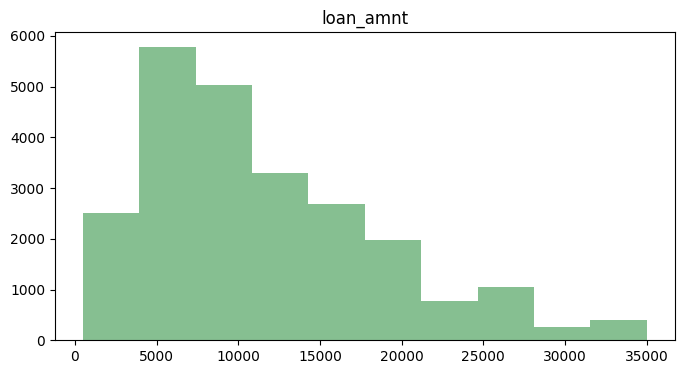

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

df.hist(column ='loan_amnt',bins =10, grid=False,figsize=(8,4), color='#86bf91')

##### Insights
From the above char we are able to conclude from the dataset available that highest number of loans were within the range of 5000-7500. Although the amount is less still we need to understand there is a high chance of defaulters for smalller amount of loans taken.

##### Comparison for the Loan Amount vs defaulters/(non defaulters)

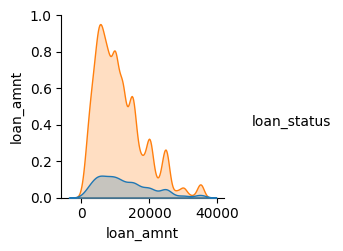

In [12]:
import seaborn
import matplotlib.pyplot as plt


#here 1 means fully paid and 0 means charged_off
df1 = df.filter(items =['loan_amnt','loan_status'])

# pairplot with hue sex
seaborn.pairplot(df1, hue ='loan_status')
# to show
plt.show()

##### Comparison with loan amount, funded amount, funded invested amt to defaulters/non_defaulters

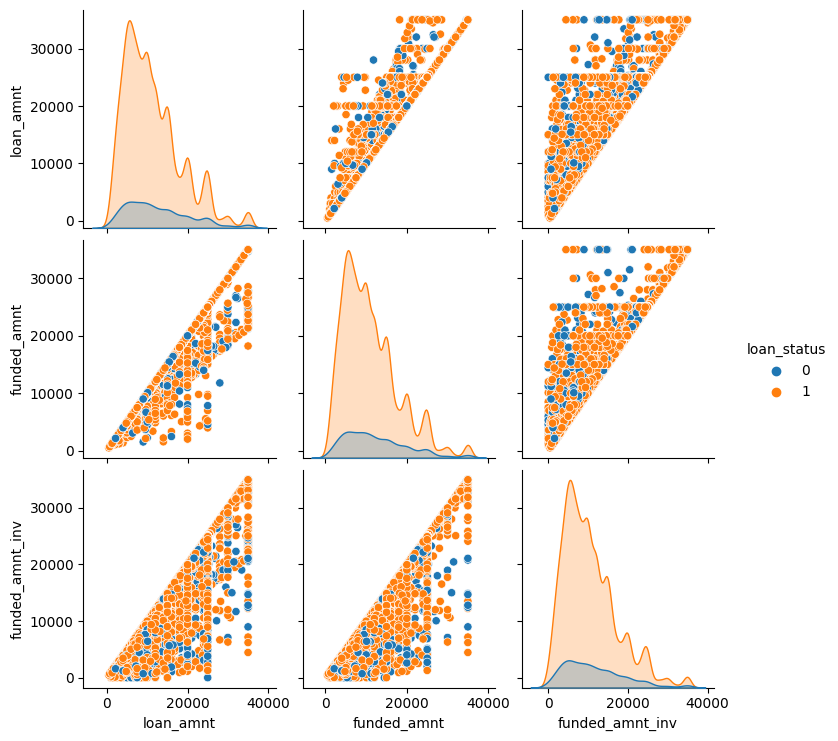

In [13]:
import seaborn
import matplotlib.pyplot as plt


#here 1 means fully paid and 0 means charged_off
df1 = df.filter(items =['loan_amnt','funded_amnt','funded_amnt_inv','loan_status'])
# df1
# pairplot with hue sex
seaborn.pairplot(df1, hue ='loan_status')
# to show
plt.show()

##### Insights
here we are able to find no relation between the loan_amt, funded_amt or the finded_invested_amt to the loan_status hence we can't infer on make decisions based o these features. 



#### Recommendation

In [14]:

#Checking unique categories in grade column
df['grade'].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [15]:

#Checking unique categories in sub-grade column
df['sub_grade'].unique()

array(['C4', 'C1', 'C5', 'E1', 'B5', 'C3', 'B1', 'A1', 'B3', 'B4', 'C2',
       'D2', 'A4', 'A5', 'B2', 'A3', 'E4', 'D3', 'F2', 'D4', 'F3', 'D1',
       'A2', 'E5', 'E3', 'F1', 'G4', 'E2', 'D5', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

##### Comparison with grades, sub grades to the defaulters/non_defaulters

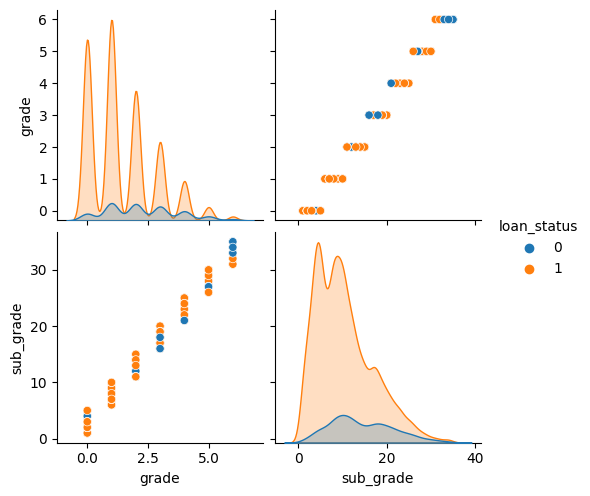

In [16]:
import seaborn
import matplotlib.pyplot as plt

df2 = df.filter(items =['grade','sub_grade','loan_status'])

# df1.rename_categories({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})
df2['grade'].replace(['A','B','C','D','E','F','G'],
                        [0,1,2,3,4,5,6], inplace=True)
df2['sub_grade'].replace(['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4',\
                         'D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'],
                        [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,\
                         34,35], inplace=True)


# pairplot with hue sex
seaborn.pairplot(df2, hue ='loan_status')
# to show
plt.show()

##### Insights
Here from the above diagram we see that in case of grades D and above there is maximum possibilty of customers defaulting the loans. With respect to the sub grades most of the defaulters are in the middle raneg or at the lowest sub grade which is important criteria since those approval falling under these category will need to play mor eemphasis.


##### Recommendation
While approving loan, once the loan is falling the specific grades and sub grades the approver needs to be extra careful since the data shows there is high chances of defaulters. 

In [17]:
df['loan_status']

0        0
1        1
2        1
3        1
4        0
        ..
23793    1
23794    1
23795    1
23796    1
23797    0
Name: loan_status, Length: 23798, dtype: int64

In [18]:
#Separating fully paid and charged off customers
df['term'].replace([' 36 months',' 60 months'],[0,1],inplace=True)
df['term'].astype('int')
df['home_ownership'].replace(['RENT','OWN','OTHER','MORTGAGE','NONE'],[0,1,2,3,4],inplace=True)
df['home_ownership'].astype('int')
fully_paid = df[df['loan_status']==1]

charged_off = df[df['loan_status']==0]

In [19]:
fully_paid

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,confidence
1,1076863,1277178,10000,10000,10000.000000,0,13.49%,339.31,C,C1,...,20.00,f,0.0,1,0,0.0,0,0.0,0.0,yes
2,1069639,1304742,7000,7000,7000.000000,1,15.96%,170.08,C,C5,...,23.51,f,0.0,1,0,0.0,0,0.0,0.0,yes
3,1072053,1288686,3000,3000,3000.000000,0,18.64%,109.43,E,E1,...,5.35,f,0.0,1,0,0.0,0,0.0,0.0,yes
5,1070078,1305201,6500,6500,6500.000000,1,14.65%,153.45,C,C3,...,16.12,f,0.0,1,0,0.0,0,0.0,0.0,yes
7,1069866,1304956,3000,3000,3000.000000,0,9.91%,96.68,B,B1,...,12.56,f,0.0,1,0,0.0,0,0.0,0.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23792,200912,200892,9400,9400,1748.288384,0,13.30%,318.09,D,D4,...,17.04,f,0.0,1,0,0.0,0,1.0,0.0,no
23793,200600,200597,7500,7500,1599.780000,0,9.83%,241.41,B,B3,...,2.69,f,0.0,1,0,0.0,0,1.0,0.0,no
23794,186572,186568,12000,12000,725.000000,0,9.01%,381.66,B,B2,...,6.64,f,0.0,1,0,0.0,0,1.0,0.0,no
23795,158706,158450,12375,12375,1000.000000,0,10.91%,404.62,C,C3,...,9.23,f,0.0,1,0,0.0,0,1.0,0.0,no


##### Comparison of defaulters to non-defaulters with respect to loan term

In [20]:
#customer defaulters in term groups
tg_ch  =  fully_paid["term"].value_counts().reset_index()
tg_ch.columns  = ["term","count"]
tg_nch =  charged_off["term"].value_counts().reset_index()
tg_nch.columns = ["term","count"]

#bar - churn
trace1 = go.Bar(x = tg_ch["term"]  , y = tg_ch["count"],
                name = "Charged_off Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

#bar - not churn
trace2 = go.Bar(x = tg_nch["term"] , y = tg_nch["count"],
                name = "Fully_Paid Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Defaulter/Non_Defaulter in Loan Terms",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Terms",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

##### Insights
With respect to the above diagram we can conclude as there is high defaulters for 36 months as term.


##### Recommendations
hence approver needs to be more careful for approving the shorter duration loans. Probably we might want to verify additional details of the borrowers apply for shorter duration loans.


##### Comparison of Verified source with defaulter/non_defaulters

In [21]:
df_good = fully_paid.copy(deep=True)
df_bad = charged_off.copy(deep=True)
# df_good
df_good['verification_status'].astype('int')
df_bad['verification_status'].astype('int')

0        1
4        0
6        1
11       0
13       2
        ..
23785    2
23787    2
23790    2
23791    2
23797    2
Name: verification_status, Length: 3375, dtype: int32

In [22]:


#First plot
tr0 = go.Bar(
    x = df_good["verification_status"].value_counts().index.values,
    y = df_good["verification_status"].value_counts().values,
    name='Non Defaulters'
)

#Second plot
tr1 = go.Bar(
    x = df_bad["verification_status"].value_counts().index.values,
    y = df_bad["verification_status"].value_counts().values,
    name="Defaulters"
)

data = [tr0, tr1]

layout = go.Layout(
    title='Verification Status Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

##### Insights
Out of the category 2(Non Verified) and 0(Verified) there are maximum defaulters however the source_verified category also has a good number of defaulters hence this category cannot be considered as an important metric to predict the defaulters.


#### Comparison of home_ownership vs defaulters/non_defaulters 

In [23]:
df2 = df.filter(items=['loan_status','home_ownership','purpose'])

import plotly.express as px
import pandas as pd
  
# plotting the scatter chart
fig = px.scatter(df2, x="home_ownership", y="purpose", color='loan_status')
 
# showing the plot
fig.show()

#### Insights
Borrowers who have their own home have negligible chances of defaulting their loan however the borrowers who are not on rent or have their own home or have mortgaged their property have the highest chance of defaulting.


##### Insights
We see above that there is more defaulters in case of people who have a mortgage or they are staying on rent.

#### Recommendations
We would need to have proper validation for customer who are staying on rent or we can also ask for some guarantor in case they are not able to pay the loan or also some financial asset which would be atleast 80% of the value could be asked to the borrower for as guarantor. 

In [24]:
df_good = df_good['verification_status'].values.tolist()
df_bad = df_bad['verification_status'].values.tolist()
df_verify = df['loan_status'].values.tolist()

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Non defaulters"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Defaulters"
)
#Third plot
tr2 = go.Histogram(
    x=df_verify,
    histnorm='probability',
    name="Overall Verified/Non Verified Status"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Non_defaulter','Defaulter', 'General Distribuition'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Source Verified/Non_verified Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\susha\AppData\Local\Programs\Python\Python38\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [25]:
df.emp_length.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [26]:
df_good = fully_paid.copy(deep=True)
df_bad = charged_off.copy(deep=True)

In [27]:
df['emp_length'].replace(['< 1 year','1 year', '2 years','3 years','4 years', '5 years',\
        '6 years', '7 years','8 years', '9 years','10+ years', ],[0,1,2,3,4,5,6,7,8,9,10], inplace = True)
df['emp_length'].astype('int')



0         0
1         1
2         2
3         3
4         0
         ..
23793    10
23794     9
23795     7
23796     6
23797     2
Name: emp_length, Length: 23798, dtype: int32

#### Comparison with Employment length vs defaulters/Non defaulters

In [28]:
#First plot
tr0 = go.Bar(
    x = df_good["emp_length"].value_counts().index.values,
    y = df_good["emp_length"].value_counts().values,
    name='Non Defaulters'
)

#Second plot
tr1 = go.Bar(
    x = df_bad["emp_length"].value_counts().index.values,
    y = df_bad["emp_length"].value_counts().values,
    name="Defaulters"
)

data = [tr0, tr1]

layout = go.Layout(
    title='Employment Length Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

##### Insights

As per the above diagram we see that borrowers who have an employment length of upto 1 yrs or within the range of 4-8yrs are more likely to default. Hence this could be an important metric to validate the loan approval.

##### Recommendations
We can check for those borrowers the spending pattern as per their annual income before approving their loan. We can also the amount of assets or net worth the borrowers have if their tenure is within 4-8 years.
We can recommend/advise the borrowers to have a second source of income in case they are likely not being able to pay the loan installments. 

##### Comparison for the Interest rate vs defaulters/(non defaulters)

In [29]:


#First plot
tr0 = go.Bar(
    x = df_good["int_rate"].value_counts().index.values,
    y = df_good["int_rate"].value_counts().values,
    name='Non Defaulters'
)

#Second plot
tr1 = go.Bar(
    x = df_bad["int_rate"].value_counts().index.values,
    y = df_bad["int_rate"].value_counts().values,
    name="Defaulters"
)

data = [tr0, tr1]

layout = go.Layout(
    title='Interest Rate Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

#### Insights
We really don't see any important relation between the interest rate and the defaulters hence this cannot be considered an important metric.


##### Comparison for the purpose of loan taken vs defaulters/(non defaulters)

##### Comparison for the loan purpose vs defaulters/(non defaulters)

In [30]:


#First plot
tr0 = go.Bar(
    x = df_good["purpose"].value_counts().index.values,
    y = df_good["purpose"].value_counts().values,
    name='Non Defaulters'
)

#Second plot
tr1 = go.Bar(
    x = df_bad["purpose"].value_counts().index.values,
    y = df_bad["purpose"].value_counts().values,
    name="Defaulters"
)

data = [tr0, tr1]

layout = go.Layout(
    title='Purpose Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

##### Insights
In case of borrowers fall under debt consolidation as category then only there is highest defaulters. Next if we see borrowers are falling under small business/credit card/other then only they are likely to default.

##### Recommendations
We can decrease the credit limit of the borrowers and we can advise them on making long term investments which would act as security for them. For the borrowers falling under the debt consolidation we need to check which are the most important subcategory of debts which is more likely to put borrowers to be defaulted according we will have to put our recommendation. Here debt consolidation could add on many form of bills, loans etc which will need to be investigated in depth. 


##### Comparison for the annual income, dti vs defaulters/(non defaulters)

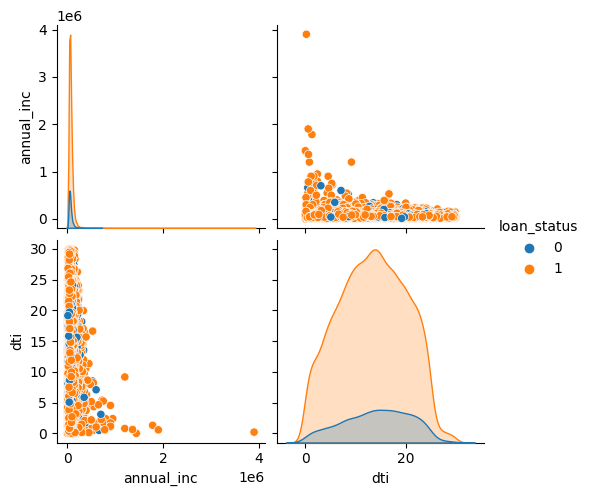

In [31]:
import seaborn
import matplotlib.pyplot as plt


df1 = df.filter(items =['annual_inc','dti','loan_status'])
# df1
# pairplot with hue sex
seaborn.pairplot(df1, hue ='loan_status')
# to show
plt.show()

##### Insights
For the category annual_inc mostly defaulters are in the starter income range hence people who have low income are most likely to default. But in case of Dti which calculates borrowers total monthly debt payments on the total debt obligations doesn;t really have any specific relation to the defaulters since the defaulters are spread across.

##### Recommendation 
We need to advise the borrowers who have just started their professional career to take help from a proper financial advisor on how best to invest for future or accumulate wealth for long run.


In [32]:
df['confidence'].replace(['yes','no'],[0,1],inplace = True)
df['confidence'].astype('int')

0        0
1        0
2        0
3        0
4        1
        ..
23793    1
23794    1
23795    1
23796    1
23797    1
Name: confidence, Length: 23798, dtype: int32

##### Comparison for the Loan Issue date vs defaulters/(non defaulters)

In [33]:


#First plot
tr0 = go.Bar(
    x = df_good["issue_d"].value_counts().index.values,
    y = df_good["issue_d"].value_counts().values,
    name='Non Defaulters'
)

#Second plot
tr1 = go.Bar(
    x = df_bad["issue_d"].value_counts().index.values,
    y = df_bad["issue_d"].value_counts().values,
    name="Defaulters"
)

data = [tr0, tr1]

layout = go.Layout(
    title='Issue Date Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

##### Insights
Here we see that there are more defaulters for the years 2010 or before wherre there could be covid or recession which would have impacted so many defaulters. But the trend has settled down in the further years. This situation could be a metric to be considered while approving loans since financial market disruptance will impact everyone who has a job.

##### Recommendation
Govt would be extected to take some additional measures to increase more job opportunities in the market. Borrowers also can be advised to look for alternate sources of income.


##### Comparison for the confidence interval vs defaulters/(non defaulters)

In [34]:


#First plot
tr0 = go.Bar(
    x = df_good["confidence"].value_counts().index.values,
    y = df_good["confidence"].value_counts().values,
    name='Non Defaulters'
)

#Second plot
tr1 = go.Bar(
    x = df_bad["confidence"].value_counts().index.values,
    y = df_bad["confidence"].value_counts().values,
    name="Defaulters"
)

data = [tr0, tr1]

layout = go.Layout(
    title='Confidence Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

##### Insights
Here confidence yes/no is the column calculated as if the loan_amt = funded_amnt_inv that means the investor has full confidence on the borrower that he will repay the loan. We can conclude stating that there is still a high chances for the invetors who have made a very wrong intution or conclusion with respect to the borrowers. Wrong conclusions will impact financial loss to the bank. 

##### Recommendations
It would be adviseable to the investors to further investigate on the spending patters of the borrowers, if borrower has any additional liability as well, if he is holding any valuable investments etc.


There are mainly 3 types of variables which we will need to check in case of any new loan application.

1) demographic variables :- Like age, occupation, exployment details

2) Loan characteristic :- interst rate, amount of loan, purpose of loan etc

3) Customer behavoiur variable :- revolving balance, delinquent 2 years, next payment date etc

Here the customer behaviour data is generated after the loan is approved hence this will not be helpful to become the predictors for loan approval.